**Исследование продаж игр**

**Описание проекта:**
*Для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры, нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).*

**План работы:**
1. Загрузка данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Составление портрета пользователя каждого региона
5. Проверка гипотез
6. Общий вывод

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st

**1. Загрузка данных**

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Описание данных**
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Вывод: всего строк в датафрейме 16715. В данных имеются пропуски в столбцах: Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating. Названия столбцов написаны с разными регистрами. Некоторые столбцы имеют неверный тип данных.**
        

**2. Предобработка данных**

**2.1 Изменение названий столбцов.**

*Приведем названия столбцов к нижнему регистру.*

In [5]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**2.2 Преобразование данных в нужные типы.**

*Изменяем тип данных столбца year_of_release на int, т.к. в нем содержатся целые числа. Т.к. в нем имеются пропуски предварительно обработаем их.*

*Изучим строки с пропусками*

In [7]:
df[df['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [8]:
df['year_of_release'].isnull().sum() / len(df['name'])*100#посчитаем % пропусков в столбце

1.609332934489979

**Год релиза игры используется в дальнейшем анализе. Восстановить данные не представляется возможным. Удалим строки с отсутсвующим годом релиза, т.к. их 269 шт или 1.6%**

In [9]:
df = df.dropna(subset=['year_of_release'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [11]:
df['year_of_release'] = df['year_of_release'].astype('int')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


*Изменяем тип данных столбца critic_score на int, т.к. в нем содержатся целые числа. Т.к. в нем имеются пропуски предварительно обработаем их.*

*Изучим строки с пропусками*

In [13]:
df[df['critic_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
df['critic_score'].isnull().sum() / len(df['name'])*100#посчитаем % пропусков в столбце

51.45932141554177

**Количество пропусков в столбце critic_score составляет 8463 строки или 51%. Удалить их нельзя, поэтому заменим пропуски на значение -1.**

In [15]:
df['critic_score'] = df['critic_score'].fillna(-1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


*Изменяем тип данных столбца critic_score на int*

In [17]:
df['critic_score'] = df['critic_score'].astype('int')

*Изменяем тип данных столбца user_score на float, т.к. в нем содержатся вещественные числа. Т.к. в нем имеются пропуски предварительно обработаем их.*

*Изучим строки с пропусками*

In [18]:
df[df['user_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,-1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,NaN,NaN


In [19]:
df['user_score'].isnull().sum() / len(df['name'])*100#посчитаем % пропусков в столбце

40.1739024686854

**Количество пропусков в столбце user_score составляет 6607 строк или 40%. Удалить их нельзя, поэтому заменим пропуски на значение -1.**

In [20]:
df['user_score'] = df['user_score'].fillna(-1)

**Также в столбце имеются значения tbd, которые вероятно планировали заполнить позже. Количество значений tbd в столбце user_score составляет 14%. Удалить их нельзя, поэтому заменим пропуски на значение -1.**

In [21]:
df[df['user_score']=='tbd']['user_score'].count() / len(df['name'])*100

14.447282013863552

In [22]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = -1# заменяем tbd на -1

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  int64  
 9   user_score       16446 non-null  object 
 10  rating           9768 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 1.5+ MB


*Изменяем тип данных столбца user_score на float.*

In [24]:
df['user_score'] = df['user_score'].astype('float')

*Изучим строки с пропусками в столбце name.*

In [25]:
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,-1,-1.0,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,-1,-1.0,NaN


In [26]:
df['name'].isnull().sum() / len(df['name'])*100#посчитаем % пропусков в столбце

0.012161011796181443

**Название игры используется в дальнейшем анализе. Восстановить данные не представляется возможным. Удалим строки с отсутсвующим Названием игры, т.к. их только 2 шт или 0.01%**

In [27]:
df = df.dropna(subset=['name'])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


*Изучим строки с пропусками в столбце rating.*

In [29]:
df[df['rating'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1,-1.0,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1,-1.0,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,-1,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.0,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1.0,NaN


In [30]:
df.head(10)#посмотрим какими значениями сейчас заполнен столбец rating

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1,-1.0,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1,-1.0,NaN


In [31]:
df['rating'].isnull().sum() / len(df['name'])*100#посчитаем % пропусков в столбце

40.59839455120409

**Количество пропусков в столбце rating составляет 6676 строк или 40%. Удалить их нельзя. Т.к. в столбце значения с типом object, то заменим пропуски на значение unknown.**

In [32]:
df['rating'] = df['rating'].fillna('unknown')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


**Проверим на наличие явных дубликатов**

In [34]:
df.duplicated().sum()

0

**Явные дубликаты отсутствуют.**

**Проверим на наличие неявных дубликатов по столбцам name, platform, year_of_release.**

In [35]:
df[df.duplicated(['name','platform','year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83,5.5,E


In [36]:
df.duplicated(['name','platform','year_of_release']).sum()

1

**Найдена 1 строка имеющая дубликат. Удалим дубликат.**

In [37]:
df = df.drop_duplicates(['name','platform','year_of_release']).reset_index(drop=True)

In [38]:
df.duplicated(['name','platform','year_of_release']).sum()

0

**Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец sum_sales.**

In [39]:
cols = ['na_sales', 'eu_sales', 'jp_sales','other_sales']
df['sum_sales'] = df[cols].sum(axis=1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,31.38


In [40]:
df['sum_sales'].sum()

8814.359999999999

**Вывод: суммарное число продаж составляет 8814.36 млн.копий.**

**Вывод по предобработке данных:**
* В данных обнаружено много пропусков, которые могли образоваться из-за сбора данных из разных открытых источников.
* Год релиза игры используется в дальнейшем анализе. Восстановить данные не представляется возможным. Удалили строки с отсутсвующим годом релиза, т.к. их 269 шт или 1.6%.
* Количество пропусков в столбце critic_score составляет 8463 строки или 51%. Удалить их нельзя, поэтому заменим пропуски на значение -1.
* Количество пропусков в столбце user_score составляет 6607 строк или 40%. Удалить их нельзя, поэтому заменим пропуски на значение -1. Также в столбце имеются значения tbd, которые вероятно планировали заполнить позже. Количество значений tbd в столбце user_score составляет 14%. Удалить их нельзя, поэтому заменили пропуски на значение -1.
* Название игры используется в дальнейшем анализе. Восстановить данные не представляется возможным. Удалили строки с отсутсвующим названием игры, т.к. их только 2 шт или 0.01%.
* Количество пропусков в столбце rating составляет 6676 строк или 40%. Удалить их нельзя. Т.к. в столбце значения с типом object, то заменим пропуски на значение unknown.
* Явные дубликаты отсутствуют.
* Найдена 1 строка имеющая неявный дубликат. Удалили дубликат.
* Суммарное число продаж составляет 8814.36 млн.копий.

In [41]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  int64  
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
 11  sum_sales        16443 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

**3. Исследовательский анализ данных**

**3.1 Проанализируем сколько игр выпускалось в разные годы.**

In [42]:
games_by_year = df.pivot_table(index='year_of_release', values='name', aggfunc='count')

In [43]:
games_by_year

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


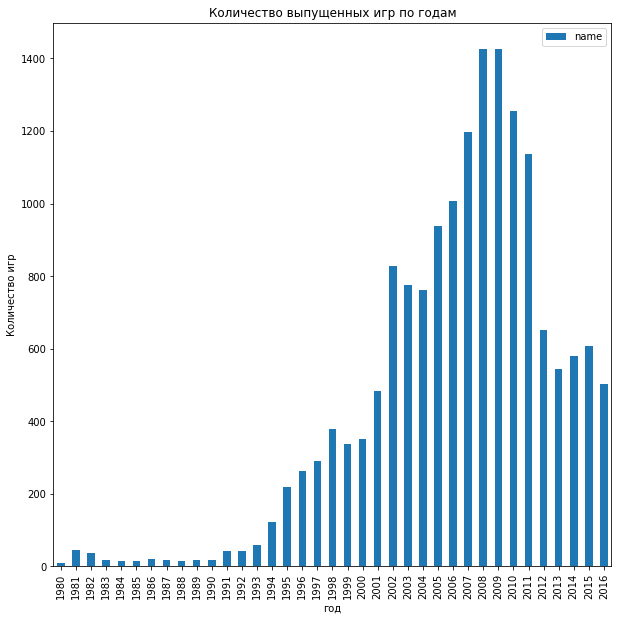

In [44]:
games_by_year.plot(kind='bar',figsize=(10, 10))
plt.title('Количество выпущенных игр по годам')
plt.ylabel('Количество игр')
plt.xlabel('год')
plt.show()

**Вывод:**
* Рост количества игр начинается в 1994 году и ускоряется начиная с 2001 года.
* Максимум достигается в 2008-2009 годах, затем начинается значительное снижение.
* С 2012 года идет разнонаправленное движение в районе средних значений за весь период.
* Для дальнейших исследований лучше брать период 2012-2016.

**3.2 Проанализируем продажи по платформам.**

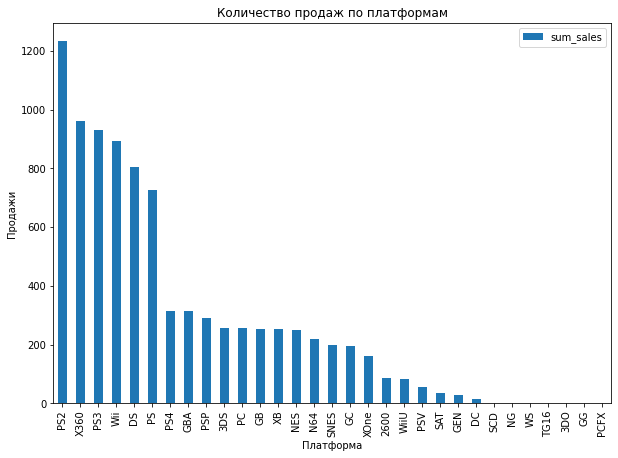

In [45]:
platform_sum = df.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False)
platform_sum.plot(kind='bar',figsize=(10, 7))
plt.title('Количество продаж по платформам')
plt.ylabel('Продажи')
plt.xlabel('Платформа')
plt.show()

**Вывод: самые большие продажи для платформ: PS2, X360, PS3, Wii, DS, PS. Продажи остальных платформ меньше в 2-4 раза.**

**3.3 Проанализируем продажи по платформам.**

*Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.*

In [46]:
max_sales_platform = platform_sum.query('sum_sales > 500')
max_sales_platform

,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58


In [47]:
df_max_sales_plat = df.query('platform in @max_sales_platform.index')
df_max_sales_plat.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91


In [48]:
max_plat_sales_by_year = df_max_sales_plat.pivot_table(index=('platform','year_of_release'), values='sum_sales', aggfunc='sum')
max_plat_sales_by_year

sum_sales
platform year_of_release           
DS       1985                  0.02
         2004                 17.27
         2005                130.14
         2006                119.81
         2007                146.94
...                             ...
X360     2012                 99.74
         2013                 88.58
         2014                 34.74
         2015                 11.96
         2016                  1.52

[67 rows x 1 columns]

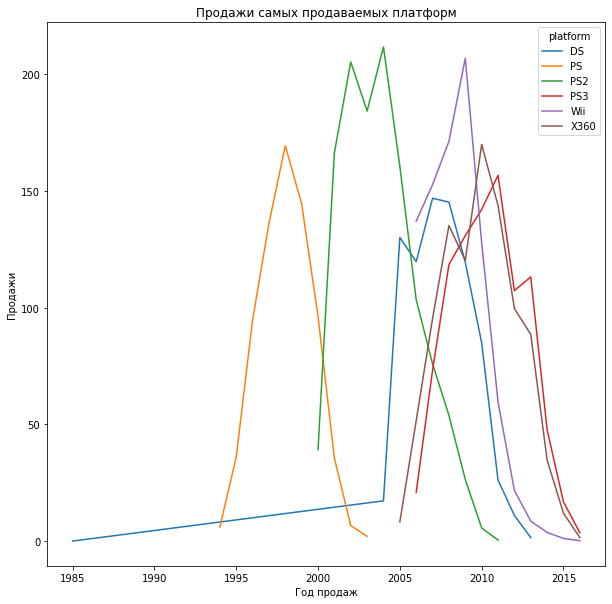

In [49]:
plt.figure(figsize=(10,10))
sns.lineplot(x='year_of_release',y='sum_sales', hue='platform', data=max_plat_sales_by_year)
plt.title('Продажи самых продаваемых платформ')
plt.xlabel('Год продаж')
plt.ylabel('Продажи')
plt.show()

*Проверим данные для платформы DS за 1985 год*

In [50]:
df.query('platform == "DS" and year_of_release < 2000')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,-1,-1.0,unknown,0.02


*Выглядит, как ошибочно заполненные данные. Удалим строку*

In [51]:
df = df.drop(index = 15704).reset_index(drop=True)

*Построим заново диаграмму*

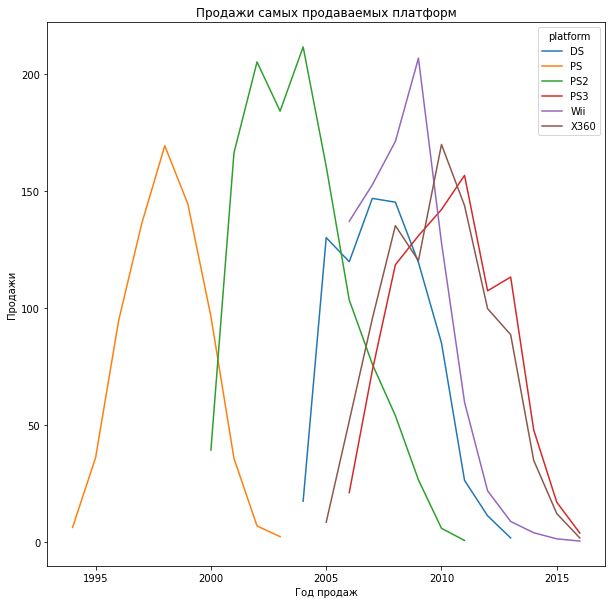

In [52]:
df_max_sales_plat = df.query('platform in @max_sales_platform.index')
max_plat_sales_by_year = df_max_sales_plat.pivot_table(index=('platform','year_of_release'), values='sum_sales', aggfunc='sum')
plt.figure(figsize=(10,10))
sns.lineplot(x='year_of_release',y='sum_sales', hue='platform', data=max_plat_sales_by_year)
plt.title('Продажи самых продаваемых платформ')
plt.xlabel('Год продаж')
plt.ylabel('Продажи')
plt.show()

*Рассчитаем медианный срок жизни платформы.*

In [53]:
time_life = df.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

In [54]:
# Комментарий ревьюера
temp = df.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

**Вывод: медианное значение длительности жизни всех платформ - 7 лет. Из графиков видно, что рост продаж происходит в первую половину жизннного цикла платформы, т.е. первые 3-4 лет. Определим актуальный период в 4 года.**

**3.4 Определение потенциально прибыльных платформ.**

*Для определения потенциально прибыльных платформ нужно найти платформы, которые показывают рост продаж за последние 4 года.*

In [55]:
actual_platforms = df.query('year_of_release >= 2012').pivot_table(index='platform', values='sum_sales',aggfunc='sum').sort_values(by='sum_sales', ascending=False)
actual_platforms

,sum_sales
platform,
PS4,314.14
PS3,288.78
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


*Создадим датафрейм за актуальный период*

In [56]:
df_actual = df.query('year_of_release >= 2012')
df_actual.head()
df_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2885 entries, 16 to 16441
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2885 non-null   object 
 1   platform         2885 non-null   object 
 2   year_of_release  2885 non-null   int64  
 3   genre            2885 non-null   object 
 4   na_sales         2885 non-null   float64
 5   eu_sales         2885 non-null   float64
 6   jp_sales         2885 non-null   float64
 7   other_sales      2885 non-null   float64
 8   critic_score     2885 non-null   int64  
 9   user_score       2885 non-null   float64
 10  rating           2885 non-null   object 
 11  sum_sales        2885 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 293.0+ KB


*Посмотрим на диаграмме, по каким платформам в актуальном периоде имеются наибольшие продажи*

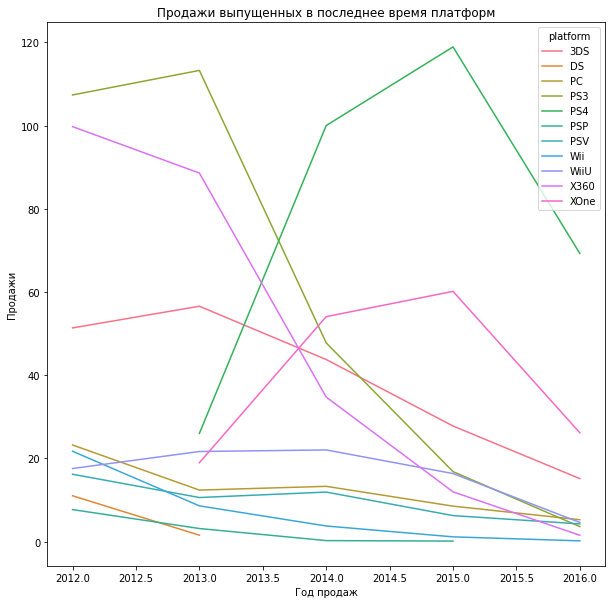

In [57]:
actual_plat_sales_by_year = df_actual.pivot_table(index=('platform','year_of_release'), values='sum_sales', aggfunc='sum')
plt.figure(figsize=(10,10))
sns.lineplot(x='year_of_release',y='sum_sales', hue='platform', data=actual_plat_sales_by_year)
plt.title('Продажи выпущенных в последнее время платформ')
plt.xlabel('Год продаж')
plt.ylabel('Продажи')
plt.show()

**Вывод: По всем платформам, актуальным начиная с 2012 года, наблюдается спад продаж в 2016 году. За 2015 год рост наблюдался у PS4 и XOne. По максимальным продажам в 2016 можно выделить то же PS4 и XOne. Поэтому наиболее перспективными в 2017 году можно считать PS4 и XOne.**

**3.5 График «ящик с усами» по глобальным продажам игр в разбивке по платформам.**

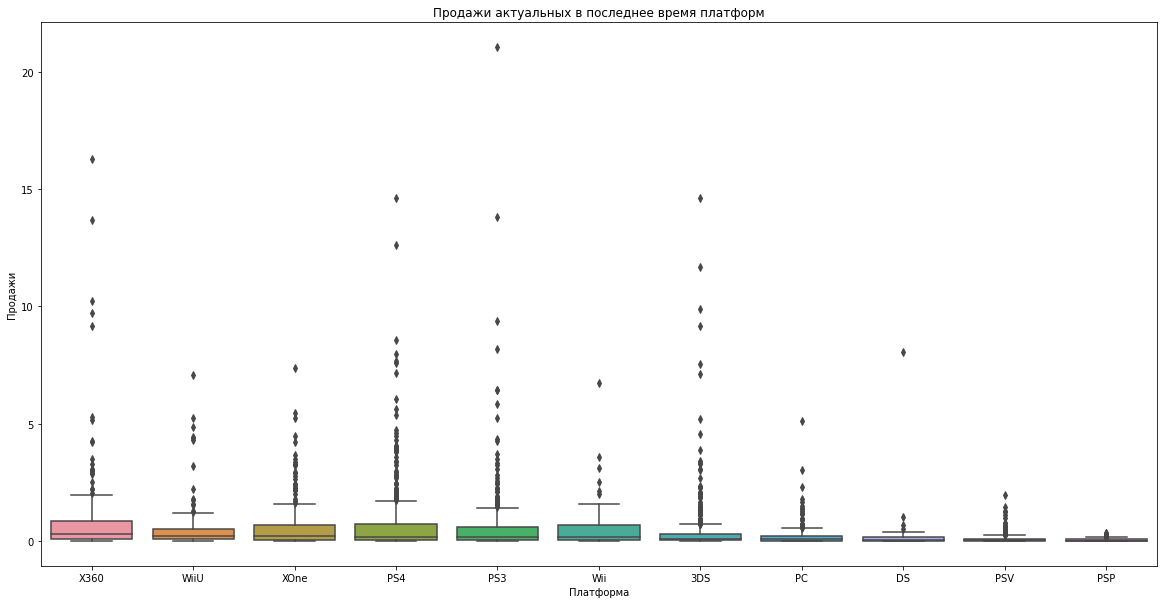

In [58]:
grouped = df_actual.groupby(['platform'])
order = grouped.median()['sum_sales'].sort_values(ascending=False).index
plt.figure(figsize=(20,10))
sns.boxplot(data=df_actual, x='platform', y='sum_sales', order=order)
plt.title('Продажи актуальных в последнее время платформ')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

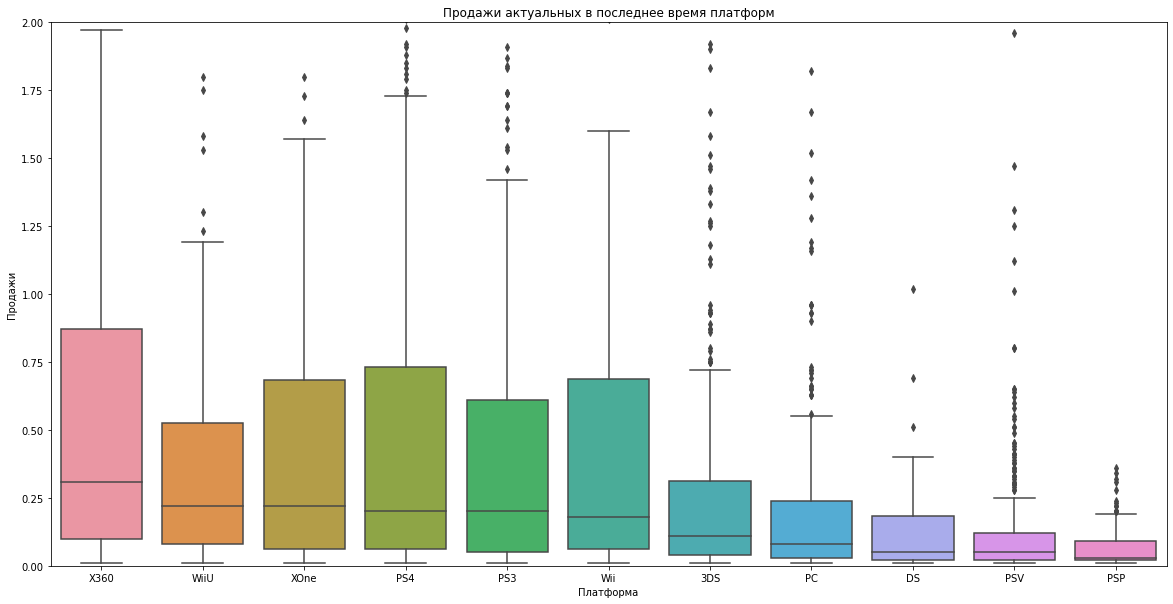

In [59]:
grouped = df_actual.groupby(['platform'])
order = grouped.median()['sum_sales'].sort_values(ascending=False).index
plt.figure(figsize=(20,10))
sns.boxplot(data=df_actual, x='platform', y='sum_sales', order=order)
plt.ylim(0,2)
plt.title('Продажи актуальных в последнее время платформ')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

In [60]:
df_actual['sum_sales'].describe()

count    2885.000000
mean        0.501393
std         1.249340
min         0.010000
25%         0.040000
50%         0.120000
75%         0.430000
max        21.050000
Name: sum_sales, dtype: float64

**Вывод:**
* самые высокие медианные значения продаж у X360, WiiU, XOne, PS4, PS3.
* самые большие межквартильные размахи значений продаж у X360, PS4.
* больше всего выбросов в данных PS4 и 3DS.

**3.6 Проанализируем, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.**

*Для анализа возьмем 5 самых популярных в последнее время платформ.*

In [61]:
df_platforms = actual_platforms.reset_index()
actual_5_platforms = df_platforms['platform'].head(5).tolist()
actual_5_platforms

['PS4', 'PS3', 'X360', '3DS', 'XOne']

*Выведем диаграммы и значения корреляции влияния отзывов критиков на продажи по 5ти самым популярным платформам в цикле:*

Корреляция между отзывами критиков и продажами платформы PS4 составляет 0.40656790206178095


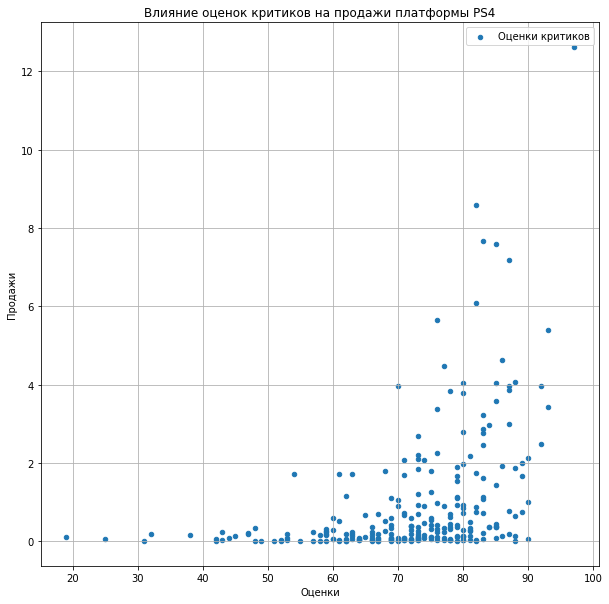

Корреляция между отзывами критиков и продажами платформы PS3 составляет 0.3341517575509856


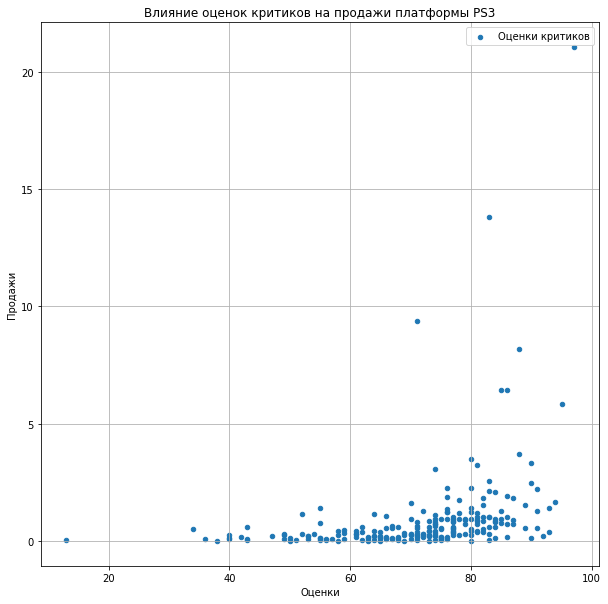

Корреляция между отзывами критиков и продажами платформы X360 составляет 0.3605734888507336


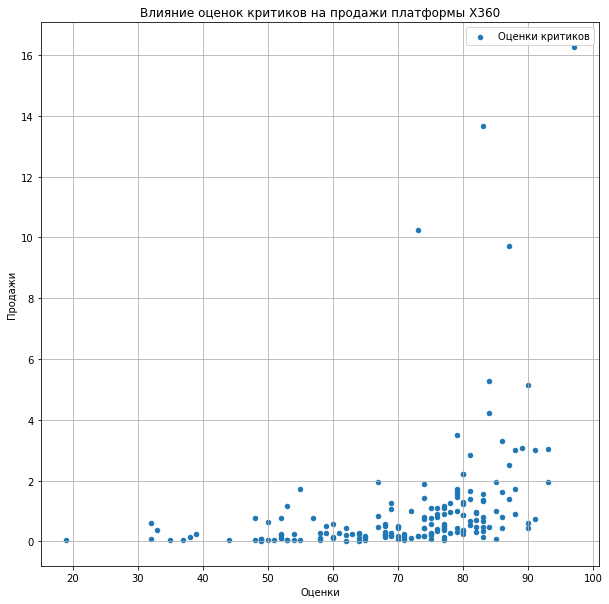

Корреляция между отзывами критиков и продажами платформы 3DS составляет 0.3208028695360785


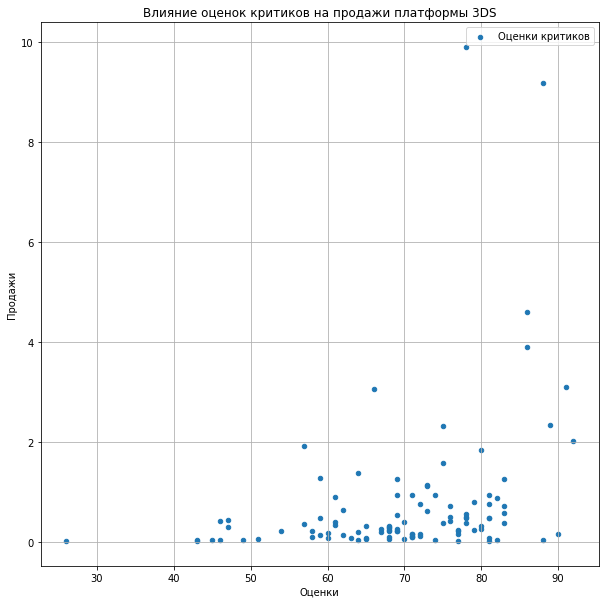

Корреляция между отзывами критиков и продажами платформы XOne составляет 0.4169983280084017


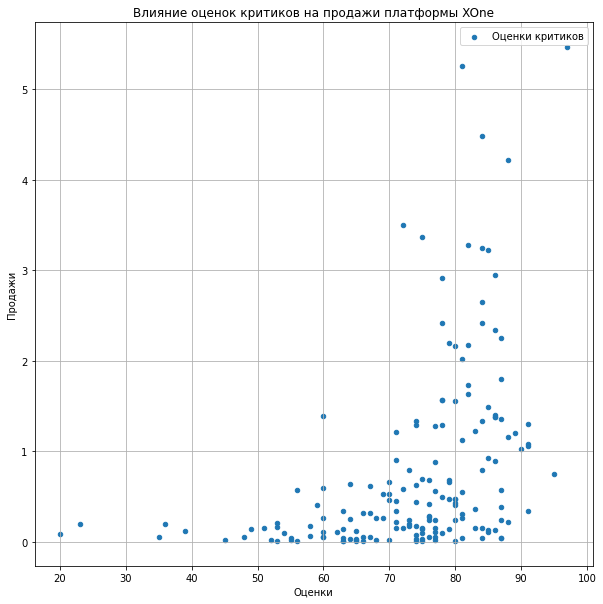

In [62]:
for platform in actual_5_platforms:
    (df_actual.query('critic_score > -1  and platform == @platform').plot(kind='scatter', x='critic_score', y='sum_sales',label='Оценки критиков',
    grid=True,
    legend=True,
    figsize=(10, 10))
    )
    plt.title(f'Влияние оценок критиков на продажи платформы {platform}')
    plt.ylabel('Продажи')
    plt.xlabel('Оценки')
    print(f'Корреляция между отзывами критиков и продажами платформы {platform} составляет', df_actual.query('critic_score > -1  and platform == @platform')['critic_score'].corr(df_actual.query('critic_score > -1  and platform == @platform')['sum_sales']))
    plt.show()

*Выведем диаграммы и значения корреляции влияния отзывов пользователей на продажи по 5ти самым популярным платформам в цикле:*

Корреляция между отзывами пользователей и продажами платформы PS4 составляет -0.031957110204556376


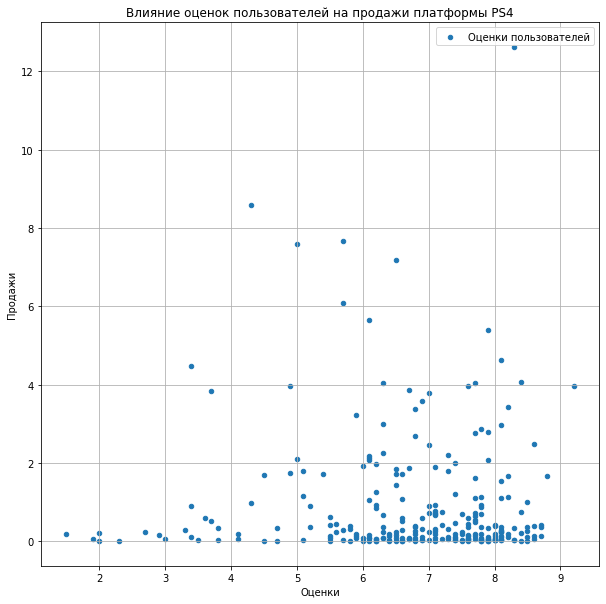

Корреляция между отзывами пользователей и продажами платформы PS3 составляет -0.006205767686051523


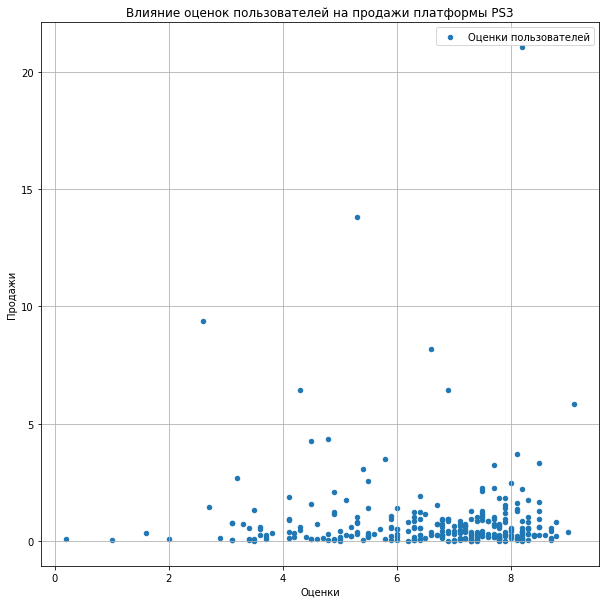

Корреляция между отзывами пользователей и продажами платформы X360 составляет 0.006163978646213326


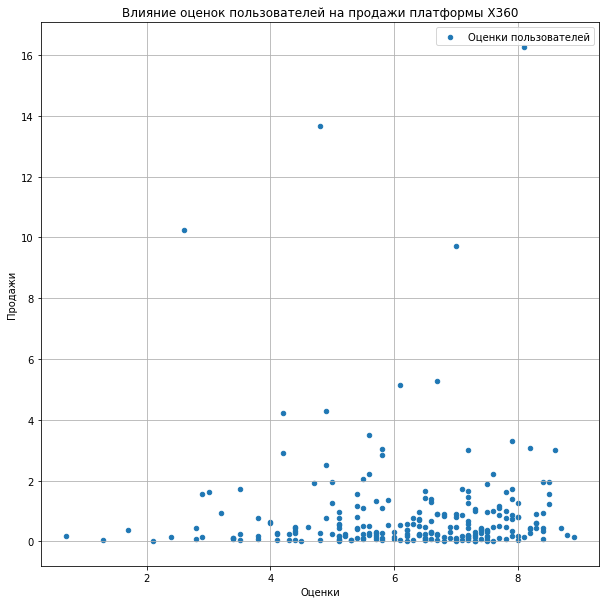

Корреляция между отзывами пользователей и продажами платформы 3DS составляет 0.19758263411038599


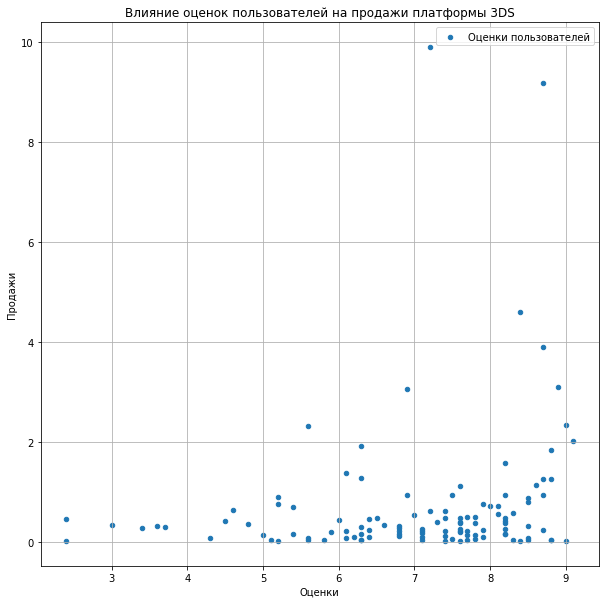

Корреляция между отзывами пользователей и продажами платформы XOne составляет -0.06892505328279414


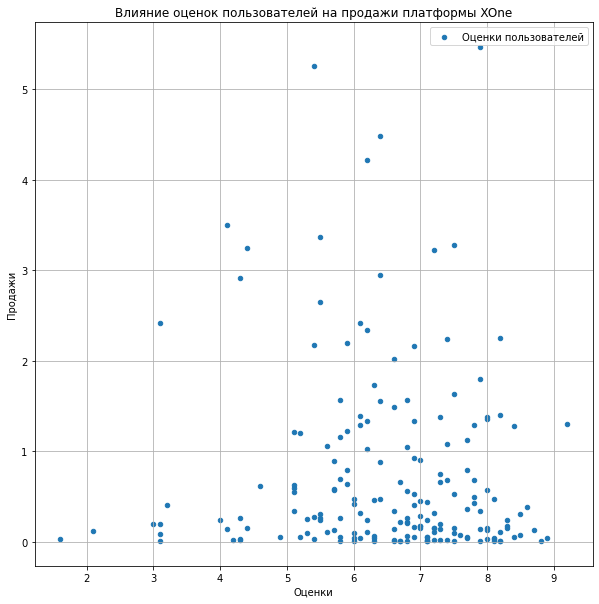

In [63]:
for platform in actual_5_platforms:
    (df_actual.query('user_score > -1  and platform == @platform').plot(kind='scatter', x='user_score', y='sum_sales',label='Оценки пользователей',
    grid=True,
    legend=True,
    figsize=(10, 10))
    )
    plt.title(f'Влияние оценок пользователей на продажи платформы {platform}')
    plt.ylabel('Продажи')
    plt.xlabel('Оценки')
    print(f'Корреляция между отзывами пользователей и продажами платформы {platform} составляет', df_actual.query('user_score > -1  and platform == @platform')['user_score'].corr(df_actual.query('user_score > -1  and platform == @platform')['sum_sales']))
    plt.show()

**Вывод:** 
    
* диаграммы рассеяния и показатели корреляции влияния отзывов критиков на продажи показывают о наличии влияния отзывов критиков на продажи.
* диаграммы рассеяния и показатели корреляции влияния отзывов пользователей на продажи показывают об отсутствии или очень слабом влияния отзывов пользователей на продажи.

**3.7 Проанализируем общее распределение игр по жанрам.**

*Построим диаграмму распределения прибыли по жанрам игр для 5ти самых популярных в последнее время платформ.*

In [64]:
# Комментарий ревьюера
#temp1, temp2 = df_young_plat.sum_sales.sum(), df[df.year_of_release > 2010].sum_sales.sum()
#temp1, temp2, round((temp2-temp1)/temp2*100, 2)

In [65]:
ganres = df_actual.pivot_table(index='genre', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales',ascending=False)
ganres

,sum_sales
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.06
Misc,85.04
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


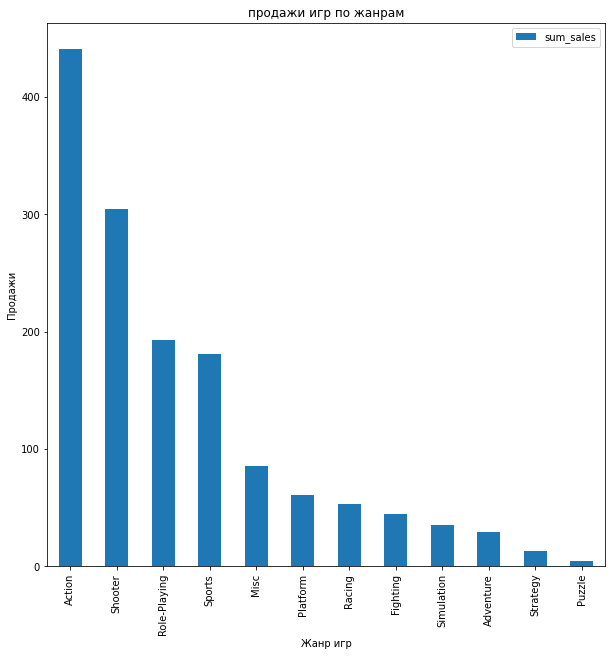

In [66]:
ganres.plot(kind='bar',figsize=(10, 10))
plt.title('продажи игр по жанрам')
plt.ylabel('Продажи')
plt.xlabel('Жанр игр')
plt.show()


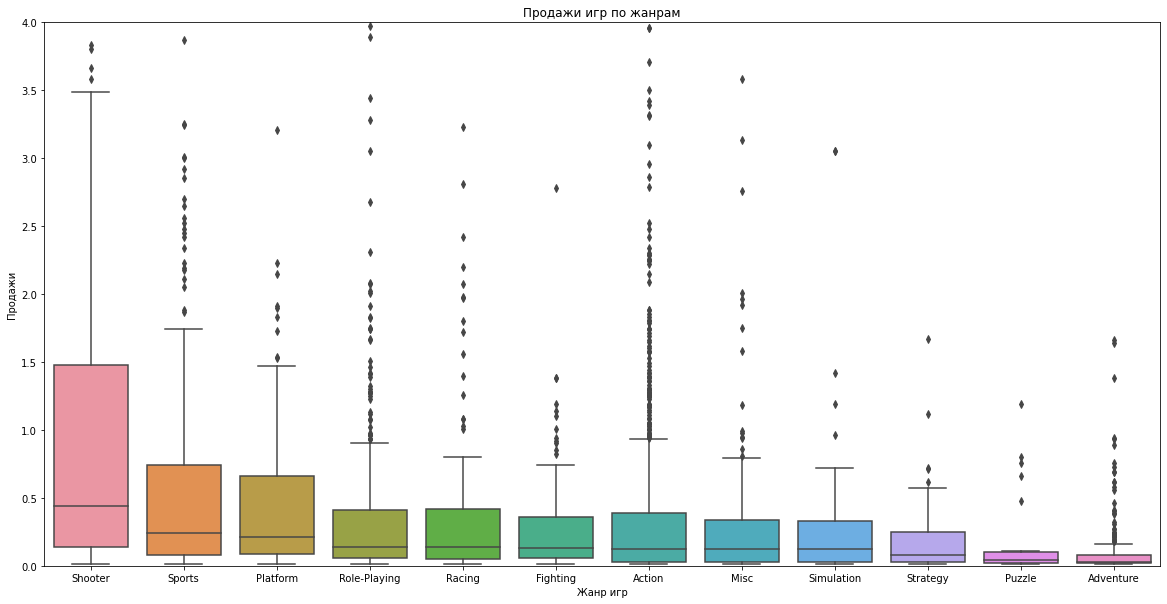

In [67]:
grouped = df_actual.groupby(['genre'])
order = grouped.median()['sum_sales'].sort_values(ascending=False).index
plt.figure(figsize=(20,10))
sns.boxplot(data=df_actual, x='genre', y='sum_sales', order=order)
plt.ylim(0,4)
plt.title('Продажи игр по жанрам')
plt.xlabel('Жанр игр')
plt.ylabel('Продажи')
plt.show()

**Вывод: самые популярные жанры игр в последнее время Action, Shooter, Role-Playing, Sports, но на диаграмме размаха видно, что самые прибыльные (максимальные медианные значения) у жанров Shooter, Sports и Platform.**

**Вывод по исследовательскому анализу данных:**
* Рост количества игр начинается в 1994 году и ускоряется начиная с 2001 года.
* Максимум достигается в 2008-2009 годах, затем начинается значительное снижение.
* С 2012 года идет разнонаправленное движение в районе средних значений за весь период.
* Для дальнейших исследований был взят период 2012-2016.

* самые большие продажи для платформ: PS2, X360, PS3, Wii, DS, PS. Продажи остальных платформ меньше в 2-4 раза.
    
* медианное значение длительности жизни всех платформ - 7 лет. Из графиков видно, что рост продаж происходит в первую половину жизннного цикла платформы, т.е. первые 3-4 лет. Определим актуальный период в 4 года.

* самые высокие медианные значения продаж у X360, WiiU, XOne, PS4, PS3.
* самые большие межквартильные размахи значений продаж у X360, PS4.
* больше всего выбросов в данных PS4 и 3DS.

* диаграммы рассеяния и показатели корреляции влияния отзывов критиков на продажи показывают о наличии влияния отзывов критиков на продажи.
* диаграммы рассеяния и показатели корреляции влияния отзывов пользователей на продажи показывают об отсутствии или очень слабом влияния отзывов пользователей на продажи.

* самые популярные жанры игр в последнее время Action, Shooter, Role-Playing, Sports, но на диаграмме размаха видно, что самые прибыльные (максимальные медианные значения) у жанров Shooter, Sports и Platform.


**4. Составление портрета пользователя каждого региона**

**4.1 Самые популярные платформы (топ-5).**

*Cоотношение продаж платформ в Северной Америке*

In [68]:
na_plat_sales = df_actual.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
na_plat_sales['proc'] = round(na_plat_sales['na_sales']/na_plat_sales['na_sales'].sum()*100,1)
na_plat_sales

,na_sales,proc
platform,,
X360,140.05,23.7
PS4,108.74,18.4
PS3,103.38,17.5
XOne,93.12,15.8
3DS,55.31,9.4
WiiU,38.10,6.4
PC,19.12,3.2
Wii,17.45,3.0
PSV,10.98,1.9


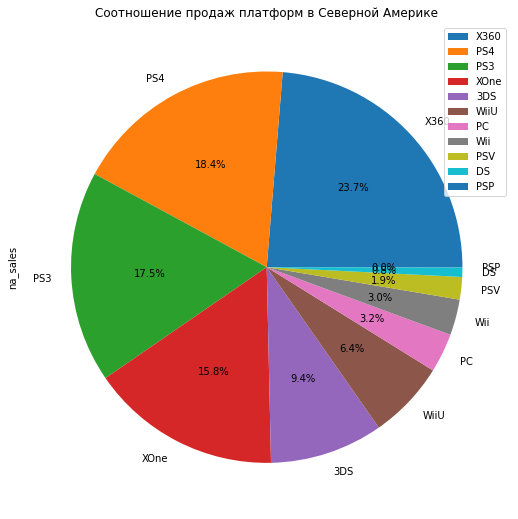

In [69]:
na_plat_sales.plot(kind='pie', y='na_sales', figsize=(9, 9), autopct='%1.1f%%')
plt.title('Cоотношение продаж платформ в Северной Америке')
plt.show()

*Cоотношение продаж платформ в Европе*

In [70]:
eu_plat_sales = df_actual.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
eu_plat_sales['proc'] = round(eu_plat_sales['eu_sales']/eu_plat_sales['eu_sales'].sum()*100,1)
eu_plat_sales

,eu_sales,proc
platform,,
PS4,141.09,27.8
PS3,106.85,21.1
X360,74.52,14.7
XOne,51.59,10.2
3DS,42.64,8.4
PC,37.76,7.5
WiiU,25.13,5.0
Wii,11.92,2.4
PSV,11.36,2.2


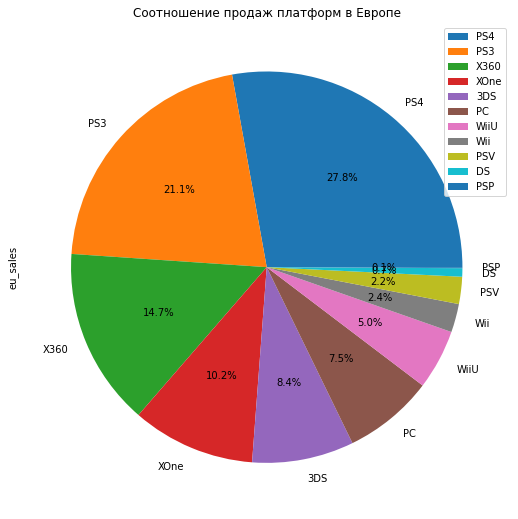

In [71]:
eu_plat_sales.plot(kind='pie', y='eu_sales',figsize=(9, 9), autopct='%1.1f%%')
plt.title('Cоотношение продаж платформ в Европе')
plt.show()

*Cоотношение продаж платформ в Японии*

In [72]:
jp_plat_sales = df_actual.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
jp_plat_sales['proc'] = round(jp_plat_sales['jp_sales']/jp_plat_sales['jp_sales'].sum()*100,1)
jp_plat_sales

,jp_sales,proc
platform,,
3DS,87.79,45.6
PS3,35.29,18.3
PSV,21.04,10.9
PS4,15.96,8.3
WiiU,13.01,6.8
PSP,10.47,5.4
DS,3.72,1.9
Wii,3.39,1.8
X360,1.57,0.8


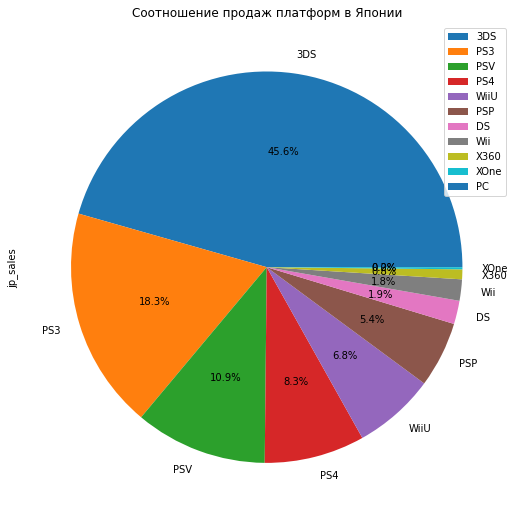

In [73]:
jp_plat_sales.plot(kind='pie', y='jp_sales',figsize=(9, 9), autopct='%1.1f%%')
plt.title('Cоотношение продаж платформ в Японии')
plt.show()

In [74]:
print(f'Самые популярные платформы в Северной Америке:')
na_plat_sales.head()

Самые популярные платформы в Северной Америке:


,na_sales,proc
platform,,
X360,140.05,23.7
PS4,108.74,18.4
PS3,103.38,17.5
XOne,93.12,15.8
3DS,55.31,9.4


In [75]:
print(f'Самые популярные платформы в Европе:')
eu_plat_sales.head()

Самые популярные платформы в Европе:


,eu_sales,proc
platform,,
PS4,141.09,27.8
PS3,106.85,21.1
X360,74.52,14.7
XOne,51.59,10.2
3DS,42.64,8.4


In [76]:
print(f'Самые популярные платформы в Японии:')
jp_plat_sales.head()

Самые популярные платформы в Японии:


,jp_sales,proc
platform,,
3DS,87.79,45.6
PS3,35.29,18.3
PSV,21.04,10.9
PS4,15.96,8.3
WiiU,13.01,6.8


**Самая популярная платформа в Северной Америке - X360 с долей продаж 23.7%**

**Самая популярная платформа в Европе - PS4 с долей продаж 27.8%**

**Самая популярная платформа в Японии - 3DS с долей продаж 45.6%**

**4.2 Самые популярные жанры (топ-5).**

*Самые популярные жанры в Северной Америке:*

In [77]:
na_genres = df_actual.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
na_genres['proc'] = round(na_genres['na_sales']/na_genres['na_sales'].sum()*100,1)
na_genres.head()

,na_sales,proc
genre,,
Action,177.84,30.1
Shooter,144.77,24.5
Sports,81.53,13.8
Role-Playing,64.00,10.8
Misc,38.19,6.5


*Самые популярные жанры в Европе:*

In [78]:
eu_genres = df_actual.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
eu_genres['proc'] = round(eu_genres['eu_sales']/eu_genres['eu_sales'].sum()*100,1)
eu_genres.head()

,eu_sales,proc
genre,,
Action,159.34,31.4
Shooter,113.47,22.4
Sports,69.08,13.6
Role-Playing,48.53,9.6
Racing,27.29,5.4


*Самые популярные жанры в Японии:*

In [79]:
jp_genres = df_actual.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
jp_genres['proc'] = round(jp_genres['jp_sales']/jp_genres['jp_sales'].sum()*100,1)
jp_genres.head()

,jp_sales,proc
genre,,
Role-Playing,65.44,34.0
Action,52.80,27.4
Misc,12.86,6.7
Simulation,10.41,5.4
Fighting,9.44,4.9


**4.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

**Описание рейтинговых групп**
* E - Everyone Для всех
* E10+ - Everyone 10+ Для всех 10+ лет
* T - Teen Для подростков 13+ лет
* M - Mature Зрелые 17+ лет
* RP - Rating Pending Рейтинг на рассмотрении

In [80]:
rating = df_actual.pivot_table(index='rating', values=('na_sales','eu_sales','jp_sales'), aggfunc='sum').sort_values(by='na_sales', ascending=False)
rating

,eu_sales,jp_sales,na_sales
rating,,,
M,193.96,21.20,231.57
E,113.02,28.33,114.37
unknown,91.50,108.84,103.31
E10+,55.37,8.19,75.70
T,52.96,26.02,66.02


*Популярнсть игр в Северной Америке и Европе в зависимости от рейтинга распределяется одинаково, на первом месте игры с рейтингом M, на втором и третьем - E и unknown соответственно, т.е. самые популярные для взрослых и для всех.*

*Самые популярные игры в Японии с рейтингом unknown, на втором и третьем месте Е и Т соответственно, т.е. большая часть данных была не заполнена, а из заполненных самые популярные для всех и для подростков.*

**Вывод по портрету пользователя для каждого региона:**
* Самая популярная платформа в Северной Америке - X360 с долей продаж 23.7%

* Самая популярная платформа в Европе - PS4 с долей продаж 27.8%

* Самая популярная платформа в Японии - 3DS с долей продаж 45.6%

* В Северной Америке и Европе распределение популярности игровых платформ (X360, PS3, PS4) и жанров игр (Action, Shooting, Sports) очень схожи.

* В Японии самая популярная платформа 3DS с долей в 41%, затем PS3. Самые популярные жанры Role-Playing и Action.

* Популярнсть игр в Северной Америке и Европе в зависимости от рейтинга распределяется одинаково, на первом месте игры с рейтингом M, на втором и третьем - E и unknown соответственно, т.е. самые популярные для взрослых и для всех.

* Самые популярные игры в Японии с рейтингом unknown, на втором и третьем месте Е и Т соответственно, т.е. большая часть данных была не заполнена, а из заполненных самые популярные для всех и для подростков.

**5. Проверка гипотез**

**5.1 Проверим гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".**

*Примем за нулевую гипотезу равенство средних рейтингов, т.к. следует проверить, что рейтинги одинаковые. Для альтернативной гипотезы примем неравенство средних рейтингов. В этом случае нужно проверить отклонение в любую сторону, поэтому нужно использовать метод scipy.stats.ttest_ind с alternative='two-sided'.*

*Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC равны.*

*Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC не равны.*

*Проверим описания выборок по двум платформам*

In [81]:
xone = df_actual.query('platform == "XOne" and user_score > -1')
xone['user_score'].describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [82]:
pc = df_actual.query('platform == "PC" and user_score > -1')
pc['user_score'].describe()

count    206.000000
mean       6.428641
std        1.664465
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

*Выборки имеют разные размеры и дисперсию. Нужно использовать метод scipy.stats.ttest_ind с equal_var=False. Примем уровень статистической значимости в 5%*

In [83]:
alpha = .05
results = st.ttest_ind(xone['user_score'], pc['user_score'], alternative='two-sided', equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


**Вывод: гипотеза не отвергнута, при уровне статистической значимости в 5%. Следовательно, средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

**5.2 Проверим гипотезу "Средние пользовательские рейтинги жанров Action и Sports разные".**

*Поступим, как и в предыдущем случае, взяв за нулевую гипотезу равенство рейтингов, но в случае отвержения нулевой гипотезы выводом будет, что рейтинги разные. Для альтернативной гипотезы примем неравенство средних рейтингов. В этом случае нужно проверить отклонение в любую сторону, поэтому нужно использовать метод scipy.stats.ttest_ind с alternative='two-sided'.*

*Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports равны.*

*Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports не равны.*

*Проверим описания выборок по двум жанрам*

In [84]:
action = df_actual.query('genre == "Action" and user_score > -1')
action['user_score'].describe()

count    523.000000
mean       6.825048
std        1.374440
min        1.600000
25%        6.250000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [85]:
sports = df_actual.query('genre == "Sports" and user_score > -1')
sports['user_score'].describe()

count    194.000000
mean       5.455670
std        1.743142
min        0.200000
25%        4.300000
50%        5.750000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64

*Выборки имеют разные размеры и дисперсию. Нужно использовать метод scipy.stats.ttest_ind с equal_var=False. Примем уровень статистической значимости в 5%*

In [86]:
alpha = .05
results = st.ttest_ind(action['user_score'], sports['user_score'], alternative='two-sided', equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 5.989458066467418e-20
Отвергаем нулевую гипотезу


**Вывод: гипотеза отвергнута, при уровне статистической значимости в 5%. Следовательно, cредние пользовательские рейтинги жанров Action и Sports разные.**

**6. Общий вывод:**

**1. Загрузили данные и изучили общую информацию**
* всего строк в датафрейме 16715. В данных имеются пропуски в столбцах: Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating. Названия столбцов написаны с разными регистрами. Некоторые столбцы имеют неверный тип данных.

**2. Предобработали данные**
* В данных обнаружено много пропусков, которые могли образоваться из-за сбора данных из разных открытых источников.
* Год релиза игры используется в дальнейшем анализе. Восстановить данные не представляется возможным. Удалили строки с отсутсвующим годом релиза, т.к. их 269 шт или 1.6%.
* Количество пропусков в столбце critic_score составляет 8463 строки или 51%. Удалить их нельзя, поэтому заменим пропуски на значение -1.
* Количество пропусков в столбце user_score составляет 6607 строк или 40%. Удалить их нельзя, поэтому заменим пропуски на значение -1. Также в столбце имеются значения tbd, которые вероятно планировали заполнить позже. Количество значений tbd в столбце user_score составляет 14%. Удалить их нельзя, поэтому заменили пропуски на значение -1.
* Название игры используется в дальнейшем анализе. Восстановить данные не представляется возможным. Удалили строки с отсутсвующим названием игры, т.к. их только 2 шт или 0.01%.
* Количество пропусков в столбце rating составляет 6676 строк или 40%. Удалить их нельзя. Т.к. в столбце значения с типом object, то заменим пропуски на значение unknown.
* Явные дубликаты отсутствуют.
* Найдена 1 строка имеющая неявный дубликат. Удалили дубликат.
* Суммарное число продаж составляет 8814.36 млн.копий.

**3. Провели исследовательский анализ данных**
* Рост количества игр начинается в 1994 году и ускоряется начиная с 2001 года.
* Максимум достигается в 2008-2009 годах, затем начинается значительное снижение.
* С 2012 года идет разнонаправленное движение в районе средних значений за весь период.
* Для дальнейших исследований был взят период 2012-2016.
* самые большие продажи для платформ: PS2, X360, PS3, Wii, DS, PS. Продажи остальных платформ меньше в 2-4 раза.
* медианное значение длительности жизни всех платформ - 7 лет. Из графиков видно, что рост продаж происходит в первую половину жизннного цикла платформы, т.е. первые 3-4 лет. Определим актуальный период в 4 года.
* самые высокие медианные значения продаж у X360, WiiU, XOne, PS4, PS3.
* самые большие межквартильные размахи значений продаж у X360, PS4.
* больше всего выбросов в данных PS4 и 3DS.
* диаграммы рассеяния и показатели корреляции влияния отзывов критиков на продажи показывают о наличии влияния отзывов критиков на продажи.
* диаграммы рассеяния и показатели корреляции влияния отзывов пользователей на продажи показывают об отсутствии или очень слабом влияния отзывов пользователей на продажи.
* самые популярные жанры игр в последнее время Action, Shooter, Role-Playing, Sports, но на диаграмме размаха видно, что самые прибыльные (максимальные медианные значения) у жанров Shooter, Sports и Platform.

**4. Составление портрета пользователя каждого региона**
* Самая популярная платформа в Северной Америке - X360 с долей продаж 23.7%
* Самая популярная платформа в Европе - PS4 с долей продаж 27.8%
* Самая популярная платформа в Японии - 3DS с долей продаж 45.6%
* В Северной Америке и Европе распределение популярности игровых платформ (X360, PS3, PS4) и жанров игр (Action, Shooting, Sports) очень схожи.
* В Японии самая популярная платформа 3DS с долей в 41%, затем PS3. Самые популярные жанры Role-Playing и Action.
* Популярнсть игр в Северной Америке и Европе в зависимости от рейтинга распределяется одинаково, на первом месте игры с рейтингом M, на втором и третьем - E и unknown соответственно, т.е. самые популярные для взрослых и для всех.
* Самые популярные игры в Японии с рейтингом unknown, на втором и третьем месте Е и Т соответственно, т.е. большая часть данных была не заполнена, а из заполненных самые популярные для всех и для подростков.

**5. Проверка гипотез**
* 5.1 Проверили гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".
* Вывод: гипотеза не отвергнута, при уровне статистической значимости в 5%. Следовательно, средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* 5.2 Проверили гипотезу "Средние пользовательские рейтинги жанров Action и Sports разные".
* Вывод: гипотеза отвергнута, при уровне статистической значимости в 5%. Следовательно, cредние пользовательские рейтинги жанров Action и Sports разные.